## 데이터 분석 프로세스_필수과제2
- 타겟 변수 로그 스케일링

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('data/trainby.csv')
test = pd.read_csv('data/testby.csv')

- 자전거 수요 예측 
- season 1 봄, 2 여름, 3 가을, 4 겨울
- holiday 0, 1 공휴일 여부 (0 공휴일 아니고, 1 공휴일)
- weather ( 1 맑음, 2 옅은 안개, 3 약간의 눈, 비와 천둥, 4 폭풍 천둥 -> 날씨가 클수록 안 좋다.
- atemp 체감온도
- humidity 상대 습도
- windspeed 풍속
- casual 등록되지 않은 사용자 수 
- registered 등록된 사용자 수 
- count 자전거 대여 수량 

### 데이터전처리

- 월,일 추출

In [4]:
# 연도, 월,일 추출
train['date'] = train['datetime'].apply(lambda x:x.split()[0])

# 연도, 월, 일, 시, 분, 초 데이터 추출
train['year']=train['datetime'].apply(lambda x:x.split()[0].split('-')[0])
train['month']=train['datetime'].apply(lambda x:x.split()[0].split('-')[1])
train['day']=train['datetime'].apply(lambda x:x.split()[0].split('-')[2])
train['hour']=train['datetime'].apply(lambda x:x.split()[1].split(':')[0])
train['minute']=train['datetime'].apply(lambda x:x.split()[1].split(':')[1])
train['second']=train['datetime'].apply(lambda x:x.split()[1].split(':')[2])

- 요일 피쳐 만들기

In [5]:
from datetime import datetime
import calendar

In [6]:
train['weekday'] = train['date'].apply(lambda dateString:calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()])

- season 1 봄, 2 여름, 3 가을, 4 겨울
- holiday 0, 1 공휴일 여부 (0 공휴일 아니고, 1 공휴일)
- weather ( 1 맑음, 2 옅은 안개, 3 약간의 눈, 비와 천둥, 4 폭풍 천둥 -> 날씨가 클수록 안 좋다.

In [7]:
train['season'] = train['season'].map({1:'Spring',
                                       2:'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist',
                                         3: 'Light Snow',
                                         4: 'ThunderStorm'})

In [8]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


### 데이터 분포 확인
- 수치형 : count, casual, registered

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

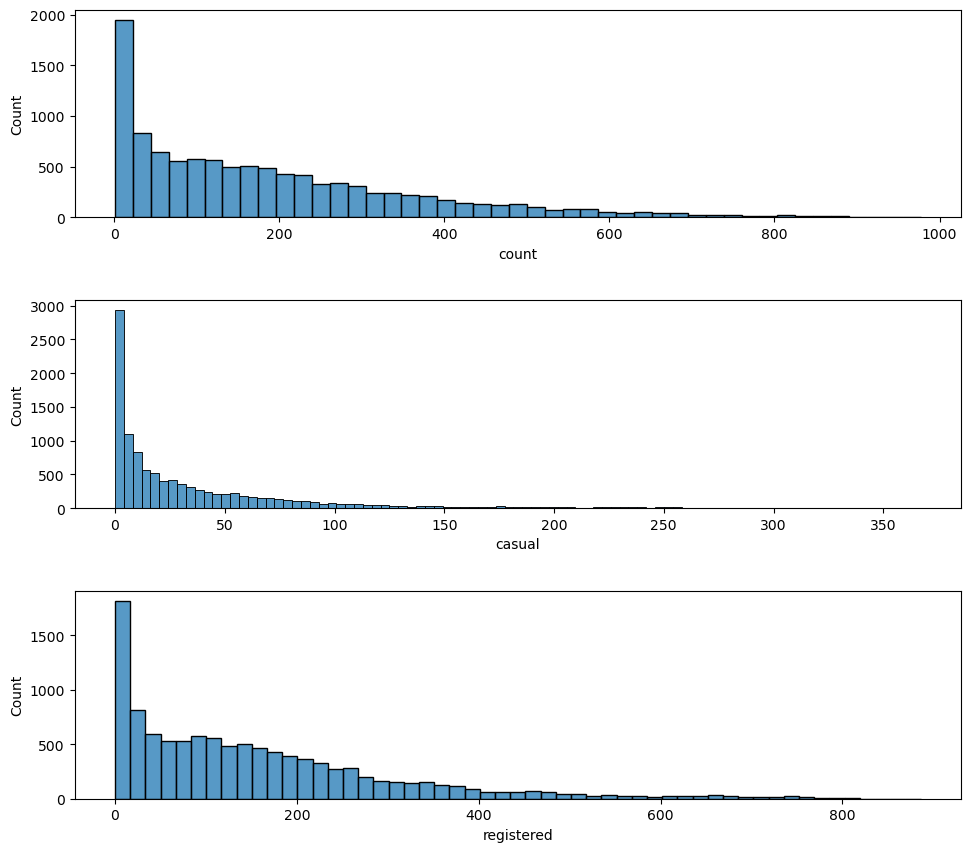

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=3)
plt.tight_layout()
fig.set_size_inches(10,9)
sns.histplot(train['count'], ax=axs[0])
sns.histplot(train['casual'], ax=axs[1])
sns.histplot(train['registered'], ax=axs[2])
plt.show()

#### 가설 1. 날씨는 count에 영향을 줄 것이다

- 날짜 별 count 분포 확인

<Axes: xlabel='second', ylabel='count'>

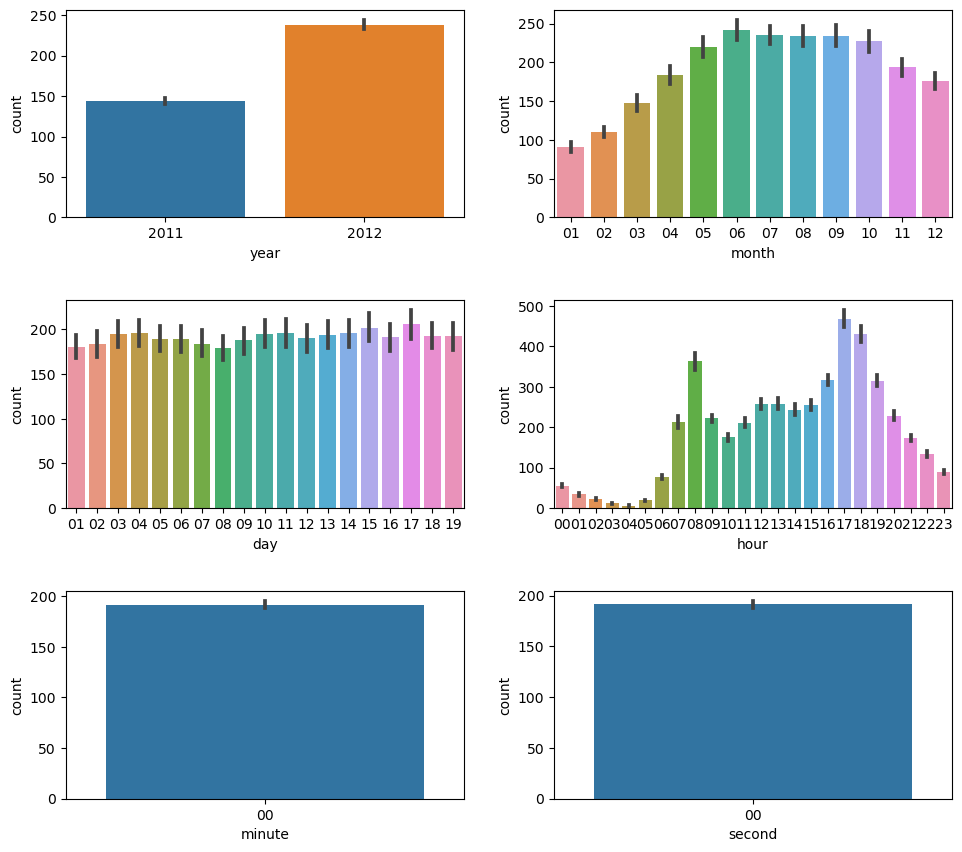

In [11]:
fig, axes= plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout() # 겹치는 x 축들 정리
fig.set_size_inches(10,9)

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

- 범주형 데이터에 따른 수치형 데이터 정보 확인하기!
- boxplot 어떤 식으로 이상치가 있는지 등을 확인하기

<Axes: xlabel='workingday', ylabel='count'>

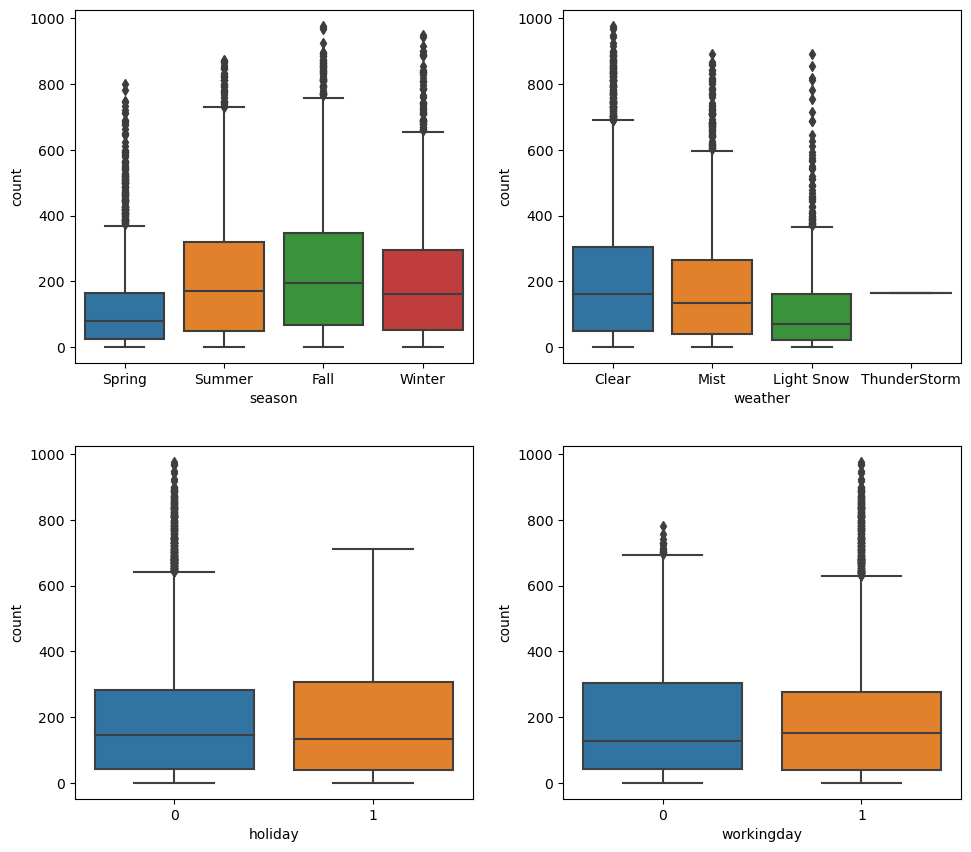

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
fig.set_size_inches(10,9)

sns.boxplot(x='season',y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather',y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday',y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday',y='count', data=train, ax=axes[1,1])

- 시간별 주중 주말 count 분포

fig, axes = plt.subplots(nrows = 5)
plt.tight_layout()
fig.set_size_inches(12,11)

sns.pointplot(x='hour', y='count',data= train, hue='workingday' , ax=axes[0])
sns.pointplot(x='hour', y='count',data= train, hue='holiday' , ax=axes[1])
sns.pointplot(x='hour', y='count',data= train, hue='weekday' , ax=axes[2])
sns.pointplot(x='hour', y='count',data= train, hue='season' , ax=axes[3])
sns.pointplot(x='hour', y='count',data= train, hue='weather' , ax=axes[4])

- working day : 출퇴근 시간에 수요 증가하는 경향
- season : 봄에 가장 수요가 적음
- weather : 날씨가 clear, mist 일때 수요가 높음

#### 피쳐들간의 관계 (산점도)

<Axes: xlabel='humidity', ylabel='count'>

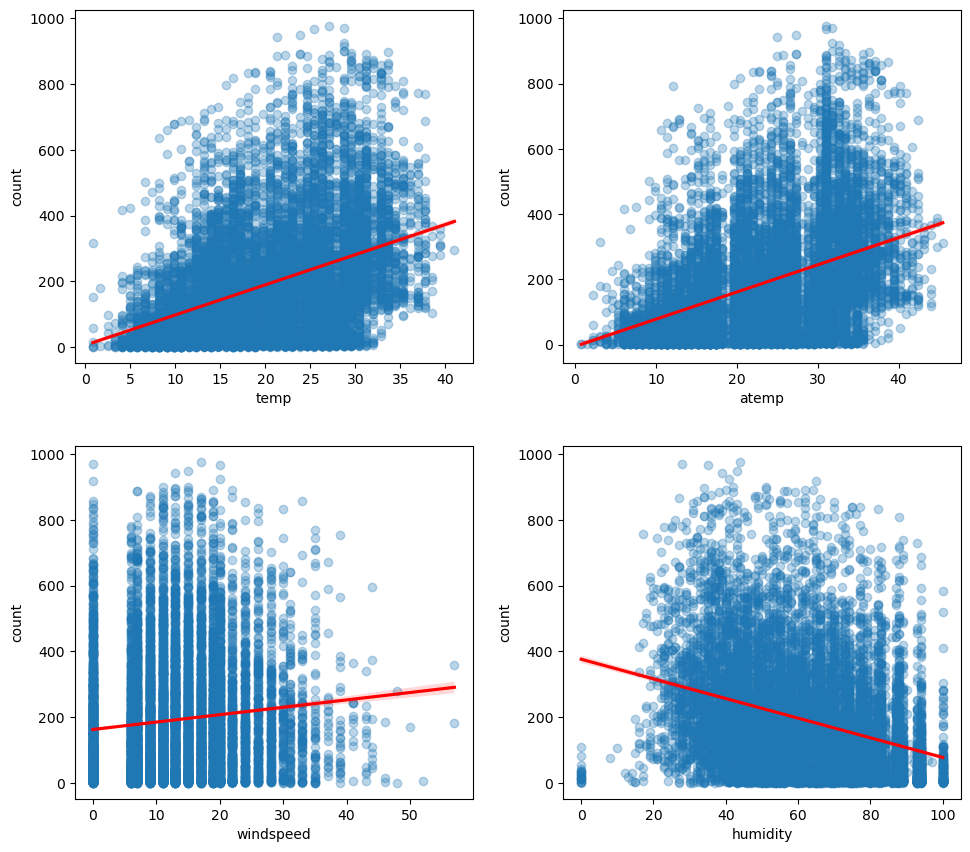

In [13]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout() # 겹치는 x축들 정리
figure.set_size_inches(10,9)


sns.regplot(x='temp',y='count',data=train, ax= axes[0,0], scatter_kws ={'alpha':0.3}, line_kws = {'color':'red'})
sns.regplot(x='atemp',y='count',data=train, ax= axes[0,1], scatter_kws ={'alpha':0.3}, line_kws = {'color':'red'})
sns.regplot(x='windspeed',y='count',data=train, ax= axes[1,0], scatter_kws ={'alpha':0.3}, line_kws = {'color':'red'})
sns.regplot(x='humidity',y='count',data=train, ax= axes[1,1], scatter_kws ={'alpha':0.3}, line_kws = {'color':'red'})

- 히트맵 상관계수

<Axes: >

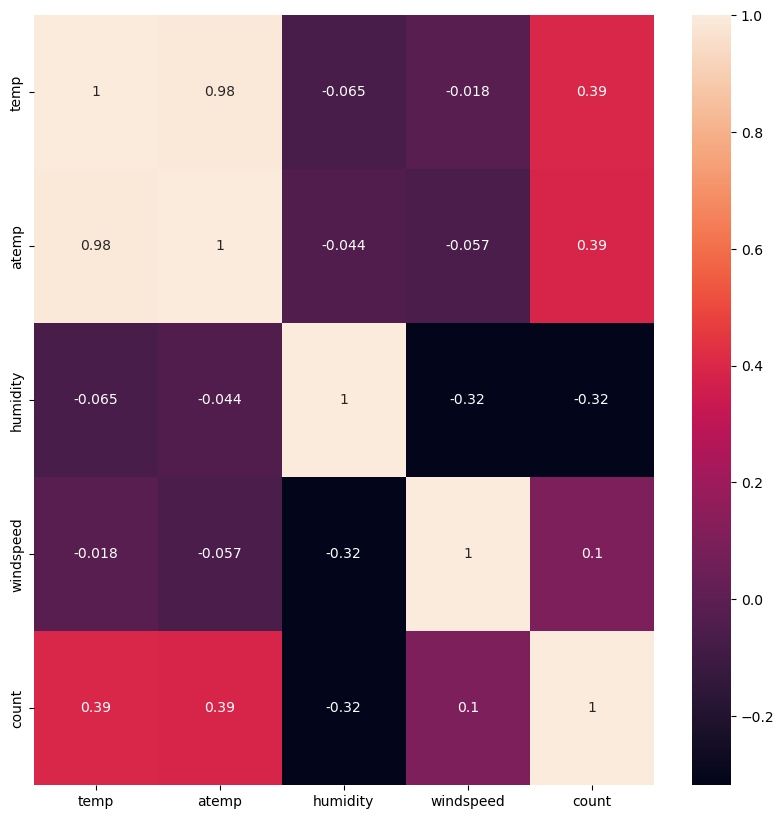

In [14]:
corrmat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrmat, annot=True)

### 모델링

- 선형회귀 모델 사용

train

In [15]:
drop_features = ['registered','casual','datetime','date','month']

In [16]:
train_fin =train.drop(drop_features, axis=1)

In [17]:
train_fin['weekday'] = train_fin['weekday'].map({'Monday':1,
                                                 'Tuesday' : 2,
                                                 'Wednesday' : 3,
                                                 'Thursday':4,
                                                 'Friday':5,
                                                 'Saturday' : 6,
                                                 'Sunday':7})

In [18]:
train_fin['season'] = train_fin['season'].map({'Spring':1,
                                      'Summer':2,
                                      'Fall':3,
                                      'Winter':4})
train_fin['weather'] = train_fin['weather'].map({'Clear':1,
                                      'Mist':2,
                                      'Light Snow':3,
                                      'Thunderstom':4})

In [19]:
train_fin # 수치형 데이터만

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,day,hour,minute,second,weekday
0,1,0,0,1.0,9.84,14.395,81,0.0000,16,2011,01,00,00,00,6
1,1,0,0,1.0,9.02,13.635,80,0.0000,40,2011,01,01,00,00,6
2,1,0,0,1.0,9.02,13.635,80,0.0000,32,2011,01,02,00,00,6
3,1,0,0,1.0,9.84,14.395,75,0.0000,13,2011,01,03,00,00,6
4,1,0,0,1.0,9.84,14.395,75,0.0000,1,2011,01,04,00,00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1.0,15.58,19.695,50,26.0027,336,2012,19,19,00,00,3
10882,4,0,1,1.0,14.76,17.425,57,15.0013,241,2012,19,20,00,00,3
10883,4,0,1,1.0,13.94,15.910,61,15.0013,168,2012,19,21,00,00,3
10884,4,0,1,1.0,13.94,17.425,61,6.0032,129,2012,19,22,00,00,3


- 로그 스케일링

In [20]:
train_fin['count_log'] = np.log1p(train_fin['count'])

In [21]:
train_fin.dropna(inplace = True)

In [36]:
from sklearn.model_selection import train_test_split
train_fin_X=train_fin[['season','holiday','workingday','weather','temp','atemp']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train_fin_X, train_fin['count_log'],test_size=0.3, random_state=111)

In [38]:
from sklearn.linear_model import LinearRegression

ln_reg_model = LinearRegression()

In [39]:
ln_reg_model.fit(X_train, y_train)

LinearRegression()

In [40]:
pred_train= ln_reg_model.predict(X_train)

In [41]:
pred_test=ln_reg_model.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
mse_train=mean_squared_error(y_true = y_train, y_pred=ln_reg_model.predict(X_train))
mse_test=mean_squared_error(y_true = y_test, y_pred=ln_reg_model.predict(X_test))

In [44]:
print(mse_train, mse_test)

1.7138420467473623 1.6795444005399505


target 변수에 로그변환을 적용한 후, 기존 값보다 mse 확연히 줄었다 